# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 14.5 MB/s 
     |████████████████████████████████| 189 kB 70.9 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 47.4 MB/s 
     |████████████████████████████████| 56 kB 6.5 MB/s 
     |████████████████████████████████| 51 kB 427 kB/s 
Mounted at /content/gdrive


Import necessary libraries

In [3]:
from fastbook import * # this will import search_images_ddg() which does not work for me
from fastai.vision.widgets import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

In [ ]:
# Load male faces from ddg
urls_m = search_images_ddg('male face', max_images=150)
len(urls_m),urls_m[0]

(171,
 'https://2.bp.blogspot.com/-lI78EbhJVpo/UzlSxhcvXdI/AAAAAAAAV44/zQMtEiiBAKY/s1600/c89bb28d5aedf8d2dd345878b5f5cb62.jpg')

In [ ]:
# load female gaces from ddg
urls_f = search_images_ddg('female face', max_images=150)
len(urls_f),urls_f[0]

(197, 'https://jooinn.com/images/pretty-girl-15.jpg')

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

0: https://2.bp.blogspot.com/-lI78EbhJVpo/UzlSxhcvXdI/AAAAAAAAV44/zQMtEiiBAKY/s1600/c89bb28d5aedf8d2dd345878b5f5cb62.jpg
1: https://cf.girlsaskguys.com/q1558850/5237c58f-4104-456d-b6d9-c2570d823d5f.jpg
2: https://i.pinimg.com/736x/a6/65/7e/a6657e3e062872ce7757a8b0d8768abd.jpg
3: https://wavyhaircut.com/wp-content/uploads/2019/09/20-selected-haircuts-for-guys-with-round-faces-with-regard-to-hairstyles-for-big-face-men.jpg
4: https://i.pinimg.com/736x/bf/6c/b0/bf6cb0a211e103a5c4c3ed1d2f02f84b.jpg
5: https://i.pinimg.com/736x/1a/e2/ba/1ae2bad7143ae74b15d6c9b34f9e13a2--handsome-faces-separate.jpg
6: https://qph.fs.quoracdn.net/main-qimg-976654a5c6100492ca62eac1f5f4c6c4-c
7: https://www.menshairstylestoday.com/wp-content/uploads/2016/06/Best-Hairstyles-For-Oval-Faced-Men.jpg
403 Client Error: Forbidden for url: https://www.menshairstylestoday.com/wp-content/uploads/2016/06/Best-Hairstyles-For-Oval-Faced-Men.jpg
8: http://www.stylishandtrendy.com/wp-content/uploads/2012/07/best-mens-hairstyl

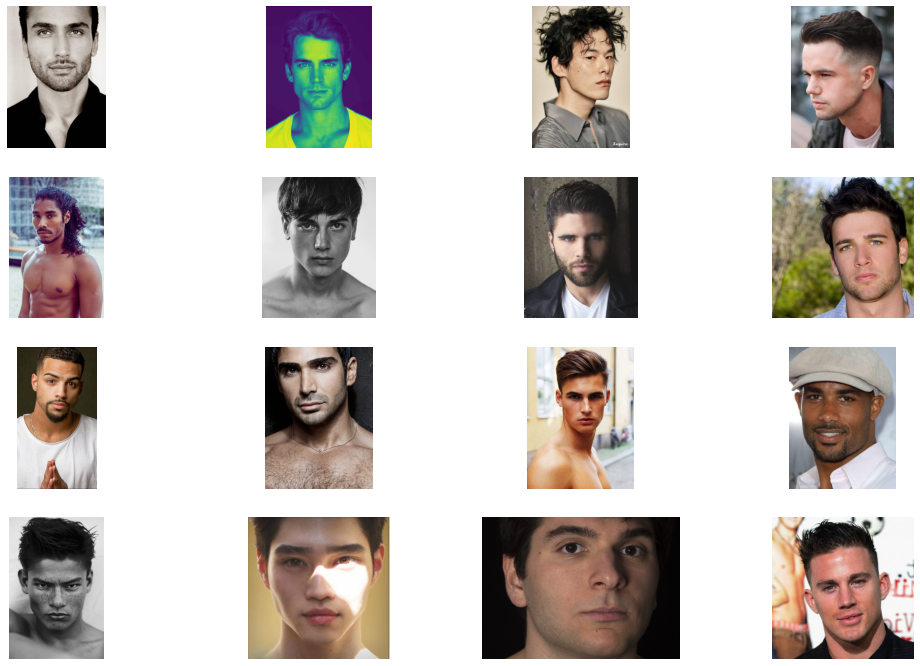

In [ ]:
# plot and show male faces gathered
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls_m):
    try:
      url = urls_m[img_i]
      print(f'{img_i}: {url}')
      image_data = requests.get(url)
      image_data.raise_for_status()
      
      image = Image.open(BytesIO(image_data.content)) 
      axes[ax_i].imshow(image)
      axes[ax_i].axis("off")
      ax_i += 1 # next axis
    except requests.exceptions.RequestException as e:
      print(e)
    finally:
      img_i += 1 # next image, especially when exception occured

      
plt.show()

0: https://jooinn.com/images/pretty-girl-15.jpg
1: https://wallup.net/wp-content/uploads/2016/05/13/335349-women-face-portrait-simple_background.jpg
2: https://www.wallpapermaiden.com/wallpaper/2758/download/1536x2048/women-brunette-model-face-portrait-semi-profile-view.jpg
3: https://wallup.net/wp-content/uploads/2016/03/03/321493-monochrome-portrait-women-face.jpg
4: https://wallup.net/wp-content/uploads/2016/01/18603-women-model-face-brunette-monochrome-portrait.jpg
5: https://wallpapercave.com/wp/wp6074166.jpg
6: https://image.freepik.com/free-photo/closeup-portrait-beautiful-smiling-redhead-ginger-woman-face-with-colorful-flowers-hair-touching-face_158538-11917.jpg
7: https://miro.medium.com/max/1200/1*b7eUuIPRoH5yE7of11JhCw.jpeg
8: https://wallup.net/wp-content/uploads/2016/05/13/330020-women-model-face-portrait.jpg
9: http://getwallpapers.com/wallpaper/full/b/6/9/17353.jpg
10: https://2.bp.blogspot.com/-GuQWOJq5WFU/TVm9znfM99I/AAAAAAAAAAc/t2y7aBL8578/s1600/633062700837533750.jpg

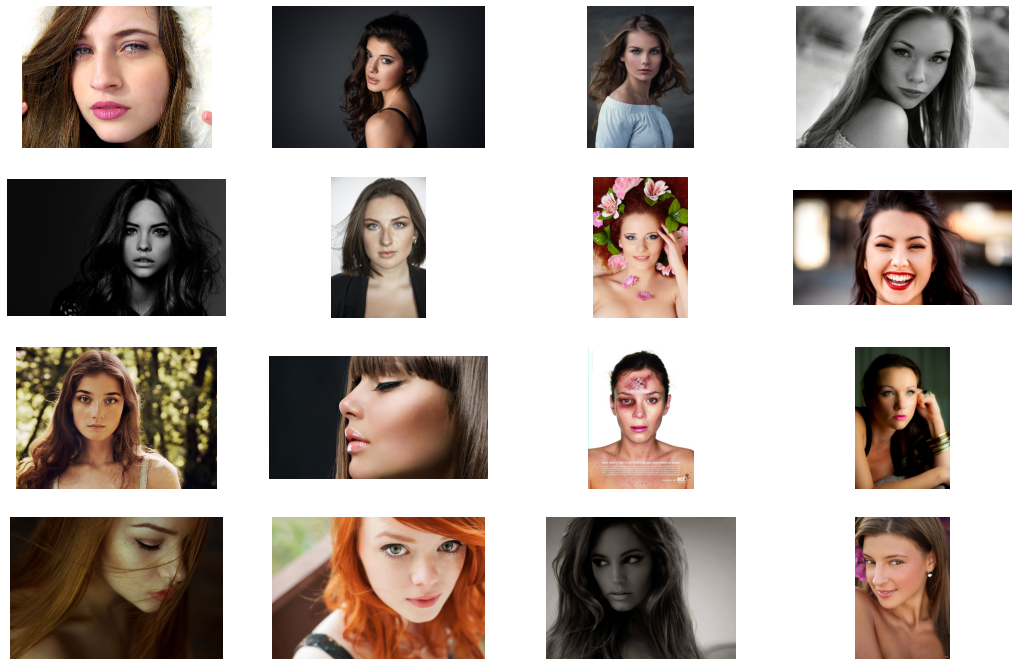

In [ ]:
# plot and show female faces gathered
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls_f):
    try:
      url = urls_f[img_i]
      print(f'{img_i}: {url}')
      image_data = requests.get(url)
      image_data.raise_for_status()
      
      image = Image.open(BytesIO(image_data.content)) 
      axes[ax_i].imshow(image)
      axes[ax_i].axis("off")
      ax_i += 1 # next axis
    except requests.exceptions.RequestException as e:
      print(e)
    finally:
      img_i += 1 # next image, especially when exception occured

      
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [4]:
# setting up the path on google drive
# export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path = Path('/content/gdrive/MyDrive/lab_1')
export_path.ls()

(#1) [Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg')]

In [55]:
class_types = 'male','female'
path = export_path/'male_or_female_ddg'
path.mkdir()

In [ ]:
if path.exists():
    # path.mkdir()
    for o in class_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} face')
        download_images(dest, urls=results)

In [6]:
path.ls()[0].ls()

(#250) [Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000001.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000005.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000007.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000002.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000008.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000009.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000010.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000006.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000011.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000000.jpg')...]

In [ ]:
for o in class_types:
  dest = (path/o)
  for filename in dest.ls():
    if filename.suffix.lower() != '.jpg':
      print(filename)

/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000014.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000023.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000026.png
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000063.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000077.gif
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000087.png
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000126.png
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000134.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000133.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000138.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000159.jpeg
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000160.png
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000180.jpg!d
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000221.png
/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male

In [7]:
fns = get_image_files(path)
fns

(#490) [Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000001.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000005.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000007.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000002.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000008.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000009.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000010.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000006.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000011.jpg'),Path('/content/gdrive/MyDrive/lab_1/male_or_female_ddg/male/00000000.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
failed.map(Path.unlink);

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

In [12]:
male_or_female = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # random crop at each iteration, resize to 224x224
    ) #(aug_transfrom)a set of transformations like  rotation, flipping
    #batch_tfms=aug_transforms())   I am ommitting this line becasue facial proportions are important for the model to find,
    #in my first attempt I did it with the transform and the model had poorer performace, i belive its much better now

In [13]:
# DataBlock is a template to create DataLoaders
dls = male_or_female.dataloaders(path)

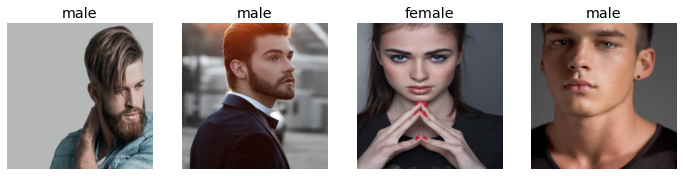

In [14]:
dls.train.show_batch(max_n=4, nrows=1)

**Question 1:** How many images of each class are in trainging and validation sets?

*20 percent of the training images are in the validation set. Since there are 250 pictures of men and 259 pictures of women. 

The male training set would hold 200 images, and the male validation set would hold 50

The female training set would hold 207 images, and the male validation set would hold 52*

In [46]:
men = (path/'male').ls().sorted()
women = (path/'female').ls().sorted()
print(len(men))
print(len(women))

250
259


## 4. Setup cnn learner
Setup a cnn learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## 5. Train binary classifier
Fine tune for 10 epochs and show results.

In [16]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.101459,0.131621,0.061224,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.269815,0.128329,0.030612,00:20
1,0.196873,0.103555,0.061224,00:19
2,0.155055,0.095472,0.051020,00:19
3,0.120925,0.105761,0.040816,00:20
4,0.097177,0.081572,0.030612,00:20
5,0.082567,0.069362,0.030612,00:20
6,0.068102,0.058743,0.020408,00:20
7,0.061945,0.055736,0.020408,00:20
8,0.053179,0.060727,0.030612,00:20
9,0.045932,0.062133,0.030612,00:20


**Question 2:** Is the model overfitting? Why, why not?

*Yes it seems to be overfitting because the training loss is lower than the validation loss*

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


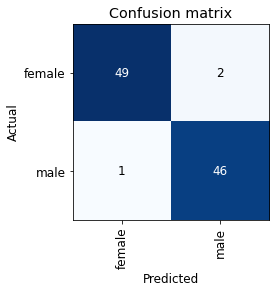

In [47]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

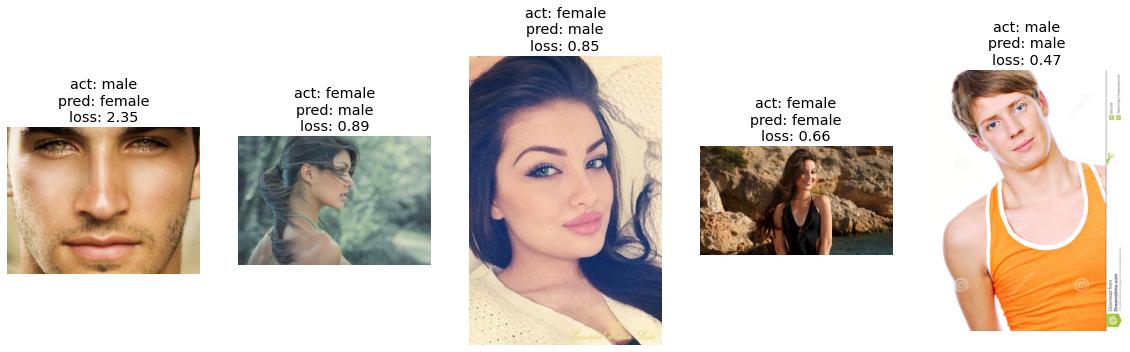

In [50]:
#plottting top 5 losses as shown in the lecture for bears
k=5
losses, idxs = interp.top_losses(k)
predicteds = interp.preds[idxs].argmax(axis=1)
fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(20, 10))

for ax, id, loss, pred in zip(axs, idxs, losses, predicteds):
    img, actual = dls.valid_ds[id]
    img.show(ctx=ax)
    ax.set_title(f'act: {dls.vocab[actual.item()]}\npred: {dls.vocab[pred]}\nloss: {loss:.2f}')

**Question 3:** How many false positive, false negative errors?

*There are 2 false positives, where the model labled the actual females as predicted males. There is 1 false negative, where the model labled an actaul male as a predicted female.*

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

*I made a male vs female face classifier.

The male training set would hold 200 images, and the male validation set would hold 50.The female training set would hold 207 images, and the male validation set would hold 52.

The error rate on the last epoch is 0.030612*

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

*There is a problem with the data, the main issue is that not enough data was used. There is also an issue with some photos as some are cartoons which isnt what the model is desinged for however that being said and done I am satisifed with the model because it was able to learn so much based off such little data we gave it. I also tried it out on my friends and myself and it correctly predicted *


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

*I really liked the fact that we could make the classifier customizable, in the sense we could choose what we wanted to train it on. This lab was really fun. I realised that running the download code cell again would donwload images from ddg even if we had already done it before, this is the reason why i have more than 150 images, I learned my lesson and chose to keep the images so the model could learn better. I am surprised that it didnt downlaod the same images but differnt ones. *

In [51]:
# If you guys are curios what the neural network would classify you with give it a shot! Keep in mind i made this due to my own curiosity
# to see if it could classify me correctly and it did however dont take it too seriously, the model is heavily flawed anyways due to the limited training data :)
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Male or Female: male
Probability ([Female, Male]): TensorBase([1.5627e-05, 9.9998e-01])


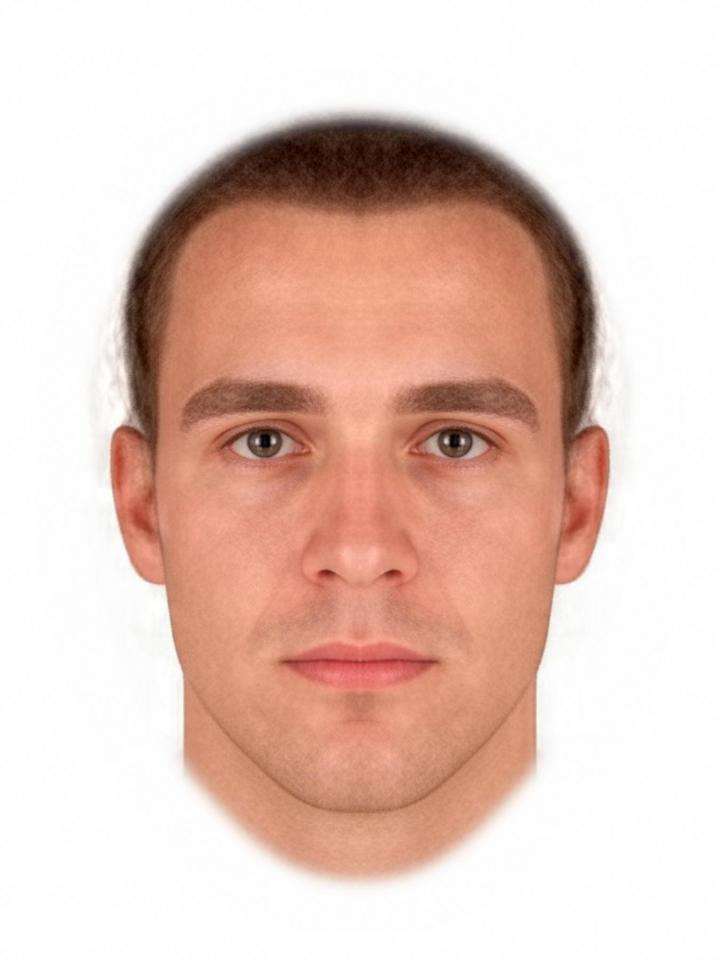

In [54]:
# here i passed a random males image from ddg, you can try it with any photo
img = PILImage.create(uploader.data[0])
mof,_,prob = learn.predict(img)
print(f"Male or Female: {mof}")
print(f"Probability ([Female, Male]): {prob}")
img